In [3]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Hello World

## Fully Connected NN, prediciendo el seno

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [5]:
print('Numpy '+np.__version__)
print('Tensorflow '+tf.__version__)
print('Keras '+ tf.keras.__version__)

Numpy 2.0.2
Tensorflow 2.18.0
Keras 3.8.0


In [6]:
nsamples = 1000
val_ratio = 0.2
test_ratio = 0.2
tflite_model_name = 'sine_model' #.tflite
c_model_name = 'sine_model' # .h

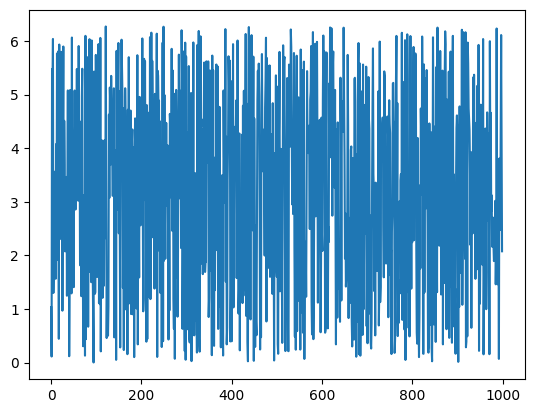

In [7]:
np.random.seed(1138)
x_values = np.random.uniform(low=0, high=2*math.pi, size=nsamples)
plt.plot(x_values)

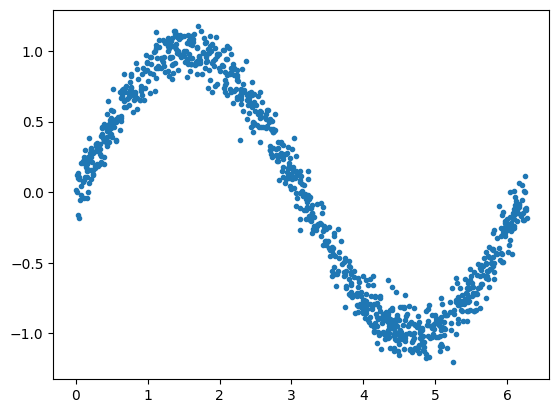

In [8]:
y_values = np.sin(x_values)+(0.1*np.random.randn(x_values.shape[0]))
plt.plot(x_values,y_values,'.')

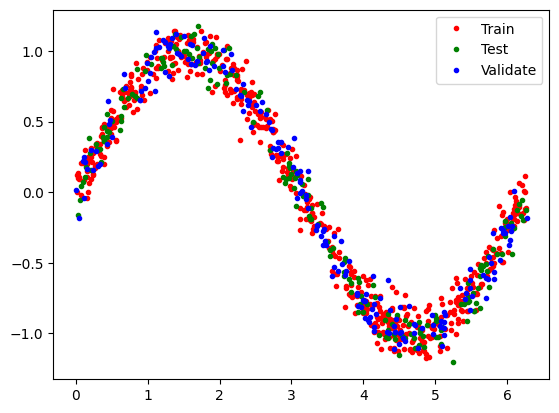

In [9]:
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val,x_test,x_train = np.split(x_values,[val_split,test_split])
y_val,y_test,y_train = np.split(y_values,[val_split,test_split])

assert (x_train.shape[0]+x_val.shape[0]+x_test.shape[0])==nsamples
plt.plot(x_train,y_train,'r.',label='Train')
plt.plot(x_test,y_test,'g.',label='Test')
plt.plot(x_val,y_val,'b.',label='Validate')
plt.legend()
plt.show()

In [10]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='rmsprop',loss='mae',metrics=['mae'])

In [12]:
history = model.fit(x_train,y_train,epochs=500,batch_size=100,validation_data=(x_val,y_val))

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.5431 - mae: 0.5431 - val_loss: 0.5291 - val_mae: 0.5291
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5338 - mae: 0.5338 - val_loss: 0.5139 - val_mae: 0.5139
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5155 - mae: 0.5155 - val_loss: 0.5047 - val_mae: 0.5047
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5148 - mae: 0.5148 - val_loss: 0.4935 - val_mae: 0.4935
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5079 - mae: 0.5079 - val_loss: 0.4841 - val_mae: 0.4841
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4801 - mae: 0.4801 - val_loss: 0.4759 - val_mae: 0.4759
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4852 - mae: 0.4852 - val_loss: 0.4707 - val_mae: 0.4707
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4690 - mae: 0.4690 - val_loss: 0.4601 - val_mae: 0.4601
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4562 - mae: 

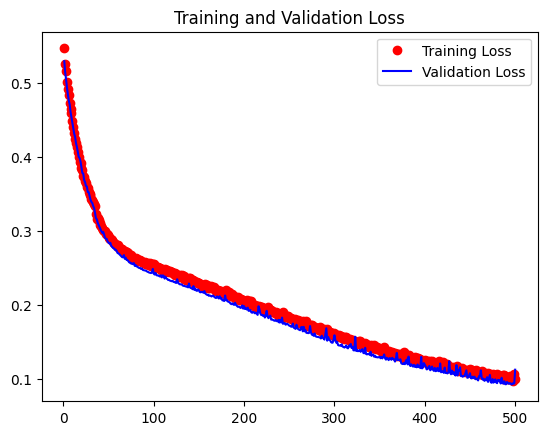

In [13]:
loss = history.history['loss']
val_los = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_los,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


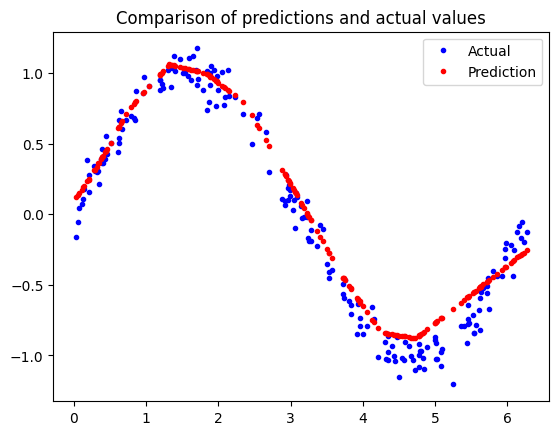

In [14]:
predictions = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_test,predictions,'r.',label='Prediction')
plt.legend()
plt.show()

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name+'.tflite','wb').write(tflite_model)

Saved artifact at '/tmp/tmpgn3xmkvz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140065426853712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065465612240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065426857552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065426856400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065426854096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065426856784: TensorSpec(shape=(), dtype=tf.resource, name=None)


3168

In [16]:
# Convierte valores hexadecimales en arreglos para programar en C
def hex_to_c_array(hex_data,var_name):

  c_str = ''

  # header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # array length
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i,val in enumerate(hex_data) :

    # string from hex
    hex_str = format(val,'#04x')

    # para que las líneas no pasen de 80 caracteres:
    if (i+1) < len(hex_data):
      hex_str += ','
    if (i+1)%12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  c_str += '\n ' + format(' '.join(hex_array) +'\n}\n\n')

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [17]:
# Convertimos el archivo TF_LITE en un arreglo constante en un header de C
with open(c_model_name+'.h','w') as file:
  file.write(hex_to_c_array(tflite_model,c_model_name))

## Fully Connected NN, clasificando fashion mnist

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [20]:
print('Numpy '+np.__version__)
print('Tensorflow '+tf.__version__)
print('Keras '+ tf.keras.__version__)

Numpy 2.0.2
Tensorflow 2.18.0
Keras 3.8.0


In [21]:
val_ratio = 0.2
test_ratio = 0.2
tflite_model_name = 'fashion_model' #.tflite
c_model_name = 'fashion_model' # .h
np.random.seed(1138)

In [22]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10 clases

X_train_full = X_train_full/255.0 # Escalamiento

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


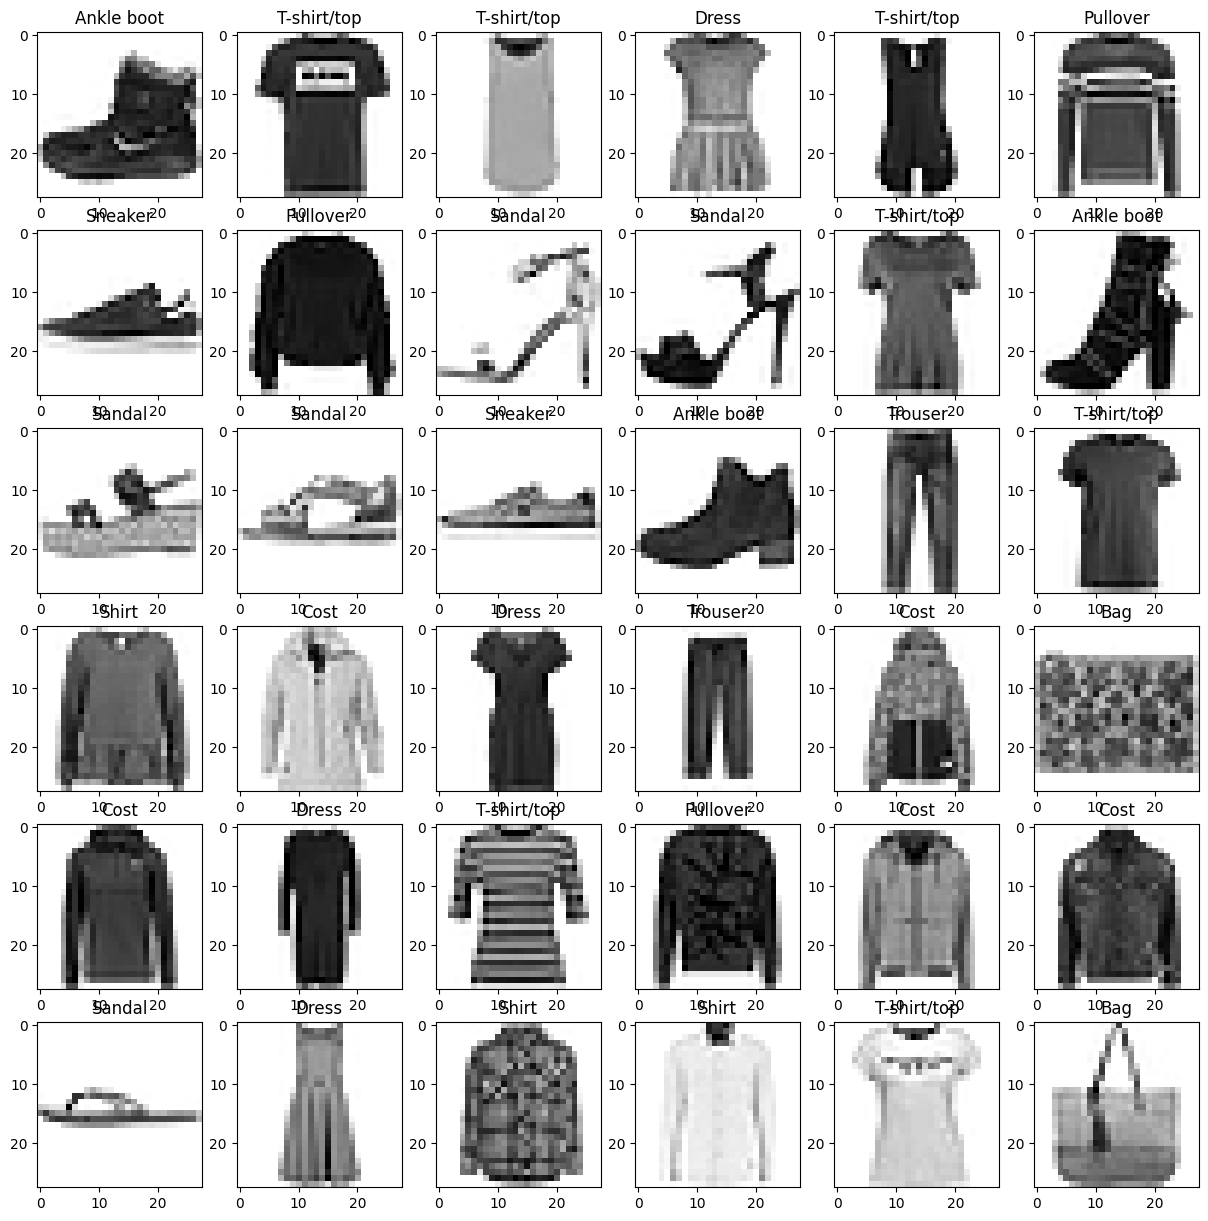

In [23]:
fig = plt.figure(figsize=(15,15))

for i in range(36):
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(X_train_full[i], cmap='gist_yarg')
    ax.set_title(class_names[y_train_full[i]])

plt.show()

In [24]:
model = tf.keras.Sequential() # Modelo secuencial
model.add(layers.Flatten(input_shape=[28, 28])) # Capa de entrada, tiene dimensiones 28x28
model.add(layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax')) # Capa de salida, salida 10 (número de clases)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
from sklearn.model_selection import train_test_split
# Utilización de datos de validación y entrenamiento del modelo
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_ratio,
                                                  stratify=y_train_full)

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5669 - loss: 1.2345 - val_accuracy: 0.8076 - val_loss: 0.5681
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7803 - loss: 0.6383 - val_accuracy: 0.8313 - val_loss: 0.4824
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8077 - loss: 0.5511 - val_accuracy: 0.8451 - val_loss: 0.4408
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8209 - loss: 0.5161 - val_accuracy: 0.8518 - val_loss: 0.4124
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8308 - loss: 0.4845 - val_accuracy: 0.8551 - val_loss: 0.3990
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8360 - loss: 0.4626 - val_accuracy: 0.8609 - val_loss: 0.3842
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8455 - loss: 0.4411 - val_accuracy: 0.8621 - val_loss: 0.3745
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8471 - loss: 0.4341

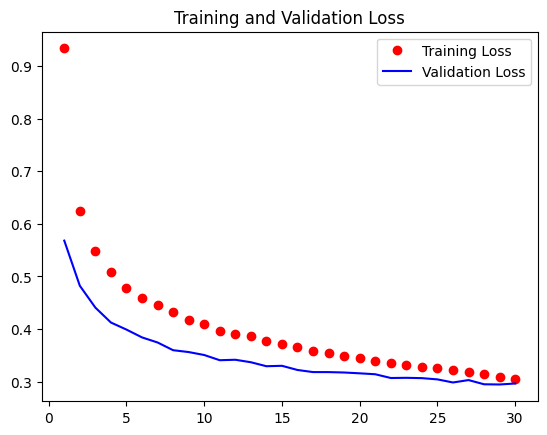

In [29]:
loss = history.history['loss']
val_los = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_los,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [30]:
X_test = X_test/255.0 # nuevamente, escalamiento de set de datos de entrenamiento
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Loss:", loss) # Función de pérdida
print("Accuracy:", acc)

313/313 - 1s - 3ms/step - accuracy: 0.8782 - loss: 0.3343
Loss: 0.3343496024608612
Accuracy: 0.8781999945640564


In [31]:
dato = 56
#dato = 74
#dato=12

In [32]:
prediction = model.predict(X_test)
print(prediction[dato])
classes_x=np.argmax(prediction,axis=1)
print("Predicción:", class_names[classes_x[dato]])
print("Clase Real:", class_names[y_test[dato]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.4665762e-04 8.7142791e-07 2.0620553e-06 3.4939873e-07 7.0946289e-06
 5.2677069e-06 2.4070803e-05 4.0337136e-06 9.9980927e-01 2.7225011e-07]
Predicción: Bag
Clase Real: Bag


In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name+'.tflite','wb').write(tflite_model)

Saved artifact at '/tmp/tmprpk9g_f2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140065400387728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065400385232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065400384272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065400388688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065400387920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065400386960: TensorSpec(shape=(), dtype=tf.resource, name=None)


278072

In [34]:
with open(c_model_name+'.h','w') as file:
  file.write(hex_to_c_array(tflite_model,c_model_name))

## Convolutional NN, clasificando fashion mnist

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [36]:
val_ratio = 0.2
test_ratio = 0.2
tflite_model_name = 'fashion_cnn_model' #.tflite
c_model_name = 'fashion_cnn_model' # .h
np.random.seed(1138)

In [37]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10 clases

X_train_full = X_train_full/255.0 # Escalamiento

In [38]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [39]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Dropout(0.25))
# Capas para la clasificación en base a la información obtenida en
# capas anteriores
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
from sklearn.model_selection import train_test_split
# Utilización de datos de validación y entrenamiento del modelo
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_ratio,
                                                  stratify=y_train_full)

In [42]:
callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5442 - loss: 1.2321 - val_accuracy: 0.7984 - val_loss: 0.5104
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.7568 - loss: 0.6675 - val_accuracy: 0.8247 - val_loss: 0.4560
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7828 - loss: 0.5938 - val_accuracy: 0.8501 - val_loss: 0.4017
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8076 - loss: 0.5443 - val_accuracy: 0.8534 - val_loss: 0.3821
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8182 - loss: 0.5072 - val_accuracy: 0.8753 - val_loss: 0.3434
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8376 - loss: 0.4603 - val_accuracy: 0.8815 - val_loss: 0.3380
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8446 - loss: 0.4372 - val_accuracy: 0.8839 - val_loss: 0.3245
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8484 -

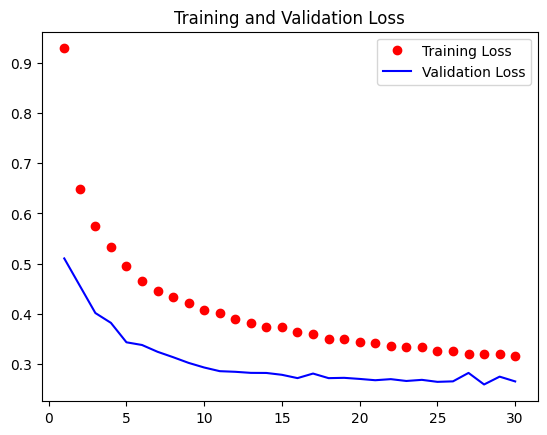

In [43]:
loss = history.history['loss']
val_los = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_los,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [44]:
X_test = X_test/255.0 # nuevamente, escalamiento de set de datos de entrenamiento
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Loss:", loss) # Función de pérdida
print("Accuracy:", acc)

313/313 - 2s - 6ms/step - accuracy: 0.9016 - loss: 0.2930
Loss: 0.2929536700248718
Accuracy: 0.9016000032424927


In [45]:
#dato = 56
#dato = 74
dato=12
prediction = model.predict(X_test)
print(prediction[dato])
classes_x=np.argmax(prediction,axis=1)
print("Predicción:", class_names[classes_x[dato]])
print("Clase Real:", class_names[y_test[dato]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[1.3136918e-06 8.3727565e-07 2.4694367e-07 6.6046675e-09 6.2670750e-08
 4.5052582e-01 1.4879059e-07 5.4026169e-01 1.3033407e-03 7.9065068e-03]
Predicción: Sneaker
Clase Real: Sneaker


In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name+'.tflite','wb').write(tflite_model)

Saved artifact at '/tmp/tmp6ddpwi7u'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_29')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140065261372240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065261377616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065261371472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065261376656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065261377424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065261375120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065275388048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065275391504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065275391888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140065275389776: TensorSpec(shape=(), dtype=tf.resource, name=None)


30392

In [47]:
with open(c_model_name+'.h','w') as file:
  file.write(hex_to_c_array(tflite_model,c_model_name))